# Seaborn full notes 

Seaborn is a statistical data-visualization library built on top of Matplotlib.
It makes it easy to create clean, attractive, and information-rich graphics with just a few lines of code.

It works especially well with pandas DataFrames, so you can call columns by name instead of array indices.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

You can also load Seaborn’s sample datasets:

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 📊 Step 3: Basic Plot Types

Let’s go one by one.

#### 1️⃣ Histogram (Distribution of a numeric variable)

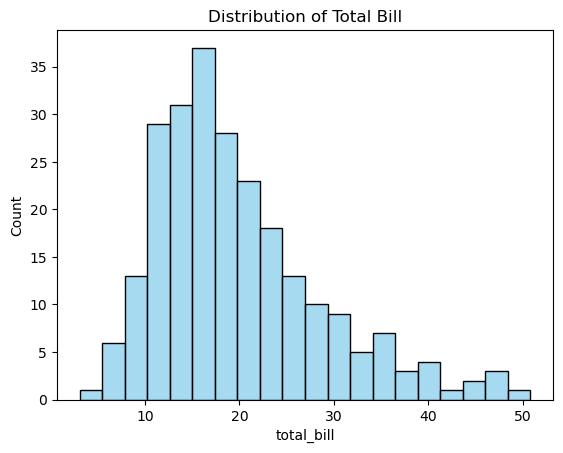

In [3]:
sns.histplot(data=tips, x="total_bill", bins=20, color="skyblue")
plt.title("Distribution of Total Bill")
plt.show()

- A histogram displays how often each range of values appears in a numeric dataset.

- Instead of showing every individual data point, it groups the data into bins (intervals) and shows how many values fall into each bin.

Here’s what happens behind the scenes:

- x="total_bill" → the numeric column to analyze.

- bins=20 → the range of total bills is split into 20 equal intervals.

- Each bar’s height shows how many customers had a bill in that range.

🧩 Common Parameters
Parameter	
- bins ->Number of intervals ->eg:bins=30
- color ->	Bar color -> eg:color="orange"
- hue -> Add a second variable for comparison -> eg:hue="sex"
- multiple->Control overlap for hue groups-> eg:multiple="dodge" or "stack"
- kde=True ->Add smooth curve(in displot)

#### 2️⃣ KDE Plot (Smooth Density)

##### What a KDE Plot Is

- KDE stands for Kernel Density Estimate.
- It estimates the probability density of a continuous variable — in simple words, it shows where your data are concentrated in a smooth, flowing curve instead of using bars.

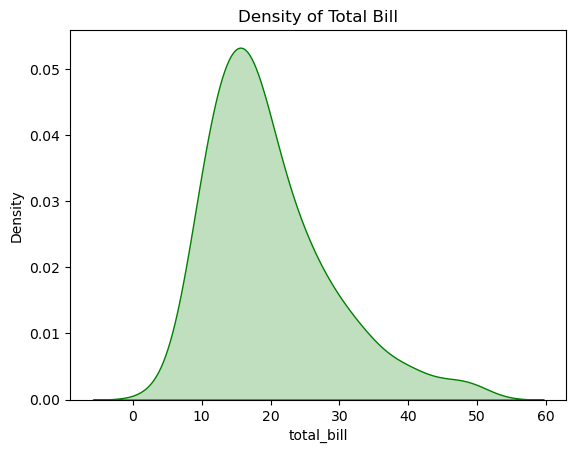

In [9]:
sns.kdeplot(data=tips, x="total_bill", fill=True, color="green")
plt.title("Density of Total Bill")
plt.show()



##### How to Read It

- The x-axis shows the variable (e.g., total bill amounts).

- The y-axis shows density — not counts, but how likely data points are to appear near each x-value.

- The peak of the curve shows where most data points lie.

- The area under the curve equals 1 (representing the whole dataset).

- fill=True colors the area under the curve for readability.

#### 3️⃣ Box Plot (Summary of spread & outliers)

A box plot (also called a box-and-whisker plot) is a compact way to visualize the spread, center, and outliers of a numeric variable.

##### Structure of a box plot:
Each boxplot has these main parts:

1. Median (Q2) – the middle value of the data (the line inside the box).

2. Q1 (25th percentile) – the value below which 25% of the data fall.

3. Q3 (75th percentile) – the value below which 75% of the data fall.

4. IQR (Interquartile Range) = Q3 − Q1 → shows how spread out the middle 50% of the data are.

5. Whiskers – usually extend 1.5×IQR from Q1 and Q3.

6. Outliers – points beyond the whiskers (individual dots).

Interpretation:

- Tall box → high variability

- Short box → low variability

- Median line near top/bottom → skewed data

- Dots outside whiskers → potential outliers


C:\Users\husna\AppData\Local\Temp\ipykernel_17520\2243217375.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tips, x="day", y="total_bill", palette="Set2")


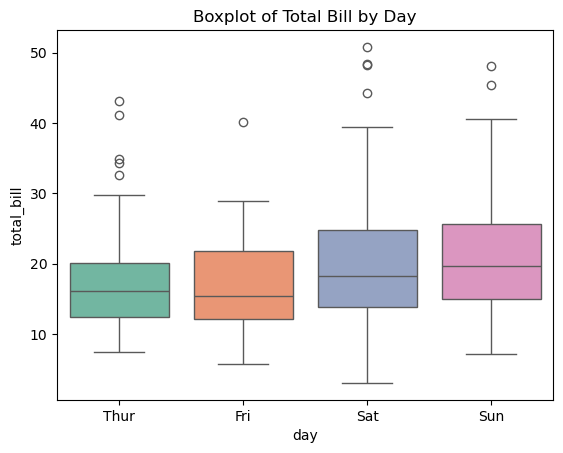

In [11]:
sns.boxplot(data=tips, x="day", y="total_bill", palette="Set2")
plt.title("Boxplot of Total Bill by Day")
plt.show()

#### 4️⃣ Violin Plot (Distribution + Density)


A violin plot is like a box plot + KDE (density plot) combined.
It shows how data are distributed for different categories — not just the summary statistics.

##### Structure of a Violin Plot

Think of it as a mirrored KDE plot around a central line (that’s why it looks like a violin 🎻).

It includes:

1. Central white dot → the median

2. Thick black bar → the interquartile range (IQR)

3. Thin black line (whiskers) → data range excluding outliers

4. Width of the shape → how many observations fall at that value (the density)

Interpretation

- Wider part → many data points there.

- Narrow part → fewer data points.

- Long tail → skewed data.

- If one side of the violin is thicker, it’s not symmetric → data are unevenly distributed.  

C:\Users\husna\AppData\Local\Temp\ipykernel_17520\2834909134.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=tips, x="day", y="total_bill", palette="Set3")


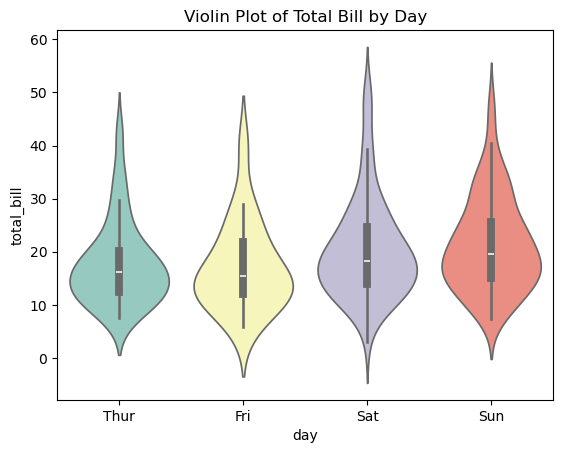

In [12]:
sns.violinplot(data=tips, x="day", y="total_bill", palette="Set3")
plt.title("Violin Plot of Total Bill by Day")
plt.show()

<Axes: xlabel='day', ylabel='total_bill'>

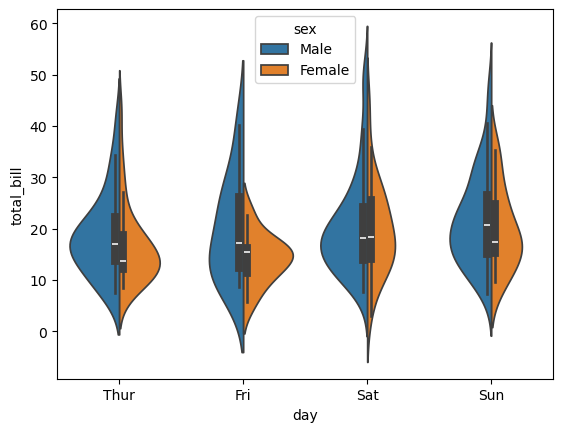

In [14]:
# Bonus — Combine with hue:
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, split=True)

#### 5️⃣ Bar Plot (Category vs Average value)

A bar plot shows the relationship between a categorical variable and a numeric variable — usually the average (mean) or total of that numeric variable for each category.

Think of it as answering questions like:

1. “Which day had the highest average bill?”
2. “Which department has the most employees?”
   
- x → categorical variable (e.g., day, gender, department)

- y → numeric variable (e.g., sales, marks, bill)

- data → the dataset



C:\Users\husna\AppData\Local\Temp\ipykernel_17520\3850209546.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tips, x="day", y="tip", palette="muted")


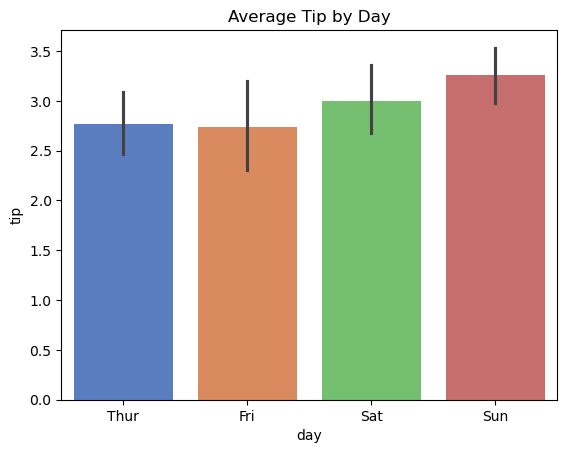

In [15]:
sns.barplot(data=tips, x="day", y="tip", palette="muted")
plt.title("Average Tip by Day")
plt.show()


#### 6️⃣ Count Plot (Frequency of each category)

A count plot shows how many observations (rows) fall into each category of a variable.
It’s like a bar chart, but instead of showing the mean or sum, it shows frequency — the number of occurrences.

Think of questions like:

1. “How many males vs females?”
2. “How many people ate on each day?”
3. “Which species appears most often in the dataset?”

C:\Users\husna\AppData\Local\Temp\ipykernel_17520\1103205364.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tips, x="day", palette="pastel")


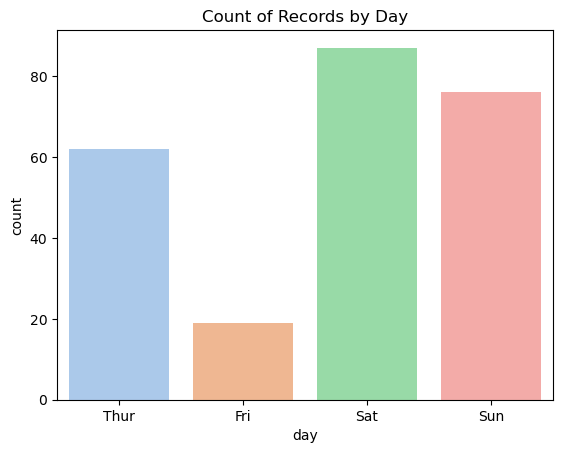

In [16]:
sns.countplot(data=tips, x="day", palette="pastel")
plt.title("Count of Records by Day")
plt.show()
